In [1]:
import pandas as pd
from textblob import TextBlob
import os  
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

print("Setup concluído! Ferramentas prontas.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ledun\AppData\Roaming\nltk_data...


Setup concluído! Ferramentas prontas.


[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
dados_musicas = []
pastas_albuns = ['renaissance', 'cowboy_carter'] # pode adicionar mais pastas com albuns

for album in pastas_albuns:
    caminho_da_pasta = album
    print(f"Analisando o álbum: {album}...")

    # pega os nomes de arquivo dentro da pasta do álbum
    for nome_arquivo in os.listdir(caminho_da_pasta):
        # lê só os txt
        if nome_arquivo.endswith('.txt'):
            caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)

            # try/except para o código não parar se der erro em um arquivo
            try:
                with open(caminho_completo, 'r', encoding='utf-8') as file:
                    letra = file.read()

                # análise com TextBlob
                blob = TextBlob(letra)
                polaridade = blob.sentiment.polarity
                subjetividade = blob.sentiment.subjectivity

                # adiciona um dicionário com os resultados na lista
                dados_musicas.append({
                    'album': album,
                    'musica': nome_arquivo.replace('.txt', ''),
                    'polaridade': polaridade,
                    'subjetividade': subjetividade
                })
            except Exception as e:
                print(f"  - Erro ao processar o arquivo {nome_arquivo}: {e}")


# transforma a lista de resultados em um DataFrame do Pandas
df = pd.DataFrame(dados_musicas)

print("\nAnálise de todas as músicas concluída!")

Analisando o álbum: renaissance...
Analisando o álbum: cowboy_carter...

Análise de todas as músicas concluída!


In [4]:
print(f"Total de músicas analisadas: {len(df)}")
df.head() #mostra as primeiras linhas do DataFrame (df)

Total de músicas analisadas: 42


,album,musica,polaridade,subjetividade
0,renaissance,alien-superstar,0.128739,0.697478
1,renaissance,all-up-in-your-mind,0.253409,0.531609
2,renaissance,america-has-problem,0.073173,0.387514
3,renaissance,break-my-soul,0.137080,0.453891
4,renaissance,church-girl,-0.122645,0.447216


In [ ]:
# cria a coluna 'sentimento' com base na polaridade
def rotulo_sentimento(polaridade):
    if polaridade > 0.1:
        return 'positivo'
    elif polaridade < -0.1:
        return 'negativo'
    else:
        return 'neutro'

df['sentimento'] = df['polaridade'].apply(rotulo_sentimento) # cria uma coluna 'sentimento' com base na polaridade (pra cada número, aplica a função rotulo_sentimento)
print(df[['musica', 'polaridade', 'sentimento']].head()) # mostra linhas do df com colunas 'musica', 'polaridade' e 'sentimento'


                musica  polaridade sentimento
0      alien-superstar    0.128739   positivo
1  all-up-in-your-mind    0.253409   positivo
2  america-has-problem    0.073173     neutro
3        break-my-soul    0.137080   positivo
4          church-girl   -0.122645   negativo


In [7]:
from sklearn.model_selection import train_test_split

# X = entradas, y = saídas (rótulos)
X = df[['polaridade', 'subjetividade']]
y = df['sentimento']

# Dividir os dados: 80% treino, 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# x_treino - tem 80% das linhas de polaridade e subjetividade
# x_teste - tem 20% das linhas de polaridade e subjetividade 
# y_treino - tem 80% das linhas de sentimento
# y_teste - tem 20% das linhas de sentimento

# treino = o modelo olha para x_treino (as perguntas) e y_treino (as respostas) para aprender
# teste = o modelo olha para x_teste (as perguntas) e tenta adivinhar y_teste (as respostas) para ver se aprendeu certo


In [8]:
from sklearn.ensemble import RandomForestClassifier # Importa o classificador Random Forest (babadeiro)

modelo = RandomForestClassifier(random_state=42) 
# cria o modelo de Random Forest com uma semente aleatória para garantir que os resultados sejam reproduzíveis
# random_state=42 é uma semente aleatória para garantir que os resultados sejam os mesmos

modelo.fit(X_treino, y_treino)
#o .fit vai treinar o modelo com os dados de treino (X_treino e y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Acurácia: 0.8888888888888888

Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.00      0.00      0.00         1
      neutro       0.67      1.00      0.80         2
    positivo       1.00      1.00      1.00         6

    accuracy                           0.89         9
   macro avg       0.56      0.67      0.60         9
weighted avg       0.81      0.89      0.84         9



c:\Users\ledun\Desktop\area de trabalho\updated_elcapitan_cursors_by_in_dolly_d9tjaf2\beyonce-sentimentos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ledun\Desktop\area de trabalho\updated_elcapitan_cursors_by_in_dolly_d9tjaf2\beyonce-sentimentos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ledun\Desktop\area de trabalho\updated_elcapitan_cursors_by_in_dolly_d9tjaf2\beyonce-sentimentos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: Undefin

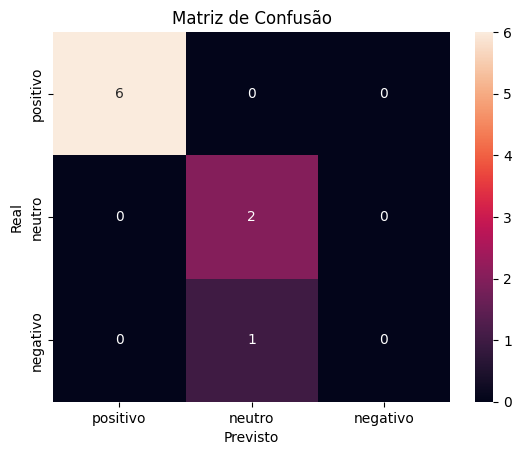

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# faz previsões com os dados de teste
y_pred = modelo.predict(X_teste)

# mostra a acurácia; compara as previsões (y_pred) com os rótulos reais (y_teste)
print("Acurácia:", accuracy_score(y_teste, y_pred))

# relatório de classificaçã
# precision = quantas previsões positivas estavam corretas
# recall = quantas das reais positivas foram previstas corretamente
# f1-score = média harmônica entre precision e recall

print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))

# matriz de confusão
# compara as previsões (y_pred) com os rótulos reais (y_teste)
cm = confusion_matrix(y_teste, y_pred, labels=['positivo', 'neutro', 'negativo'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positivo', 'neutro', 'negativo'],
            yticklabels=['positivo', 'neutro', 'negativo'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [10]:
# adiciona as previsões ao df original
# modelo.predict(X) faz previsões para todas as músicas analisadas
# x é o df com as colunas 'polaridade' e 'subjetividade
df['sentimento_previsto'] = modelo.predict(X)

# mostra as primeiras linhas do df 
# o head() mostra as primeiras linhas do df
print(df[['musica', 'sentimento', 'sentimento_previsto']].head())


                musica sentimento sentimento_previsto
0      alien-superstar   positivo            positivo
1  all-up-in-your-mind   positivo            positivo
2  america-has-problem     neutro              neutro
3        break-my-soul   positivo            positivo
4          church-girl   negativo              neutro


In [11]:
# salva o DataFrame em um arquivo CSV
# o index=False evita que o índice seja salvo no CSV
df.to_csv("analise_musical_beyonce.csv", index=False)
